In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
from scipy.sparse import hstack, csr_matrix
from IPython.display import Image
import random as rn
import os
import math
import pickle

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import concatenate, Embedding, LeakyReLU, SpatialDropout1D
from tensorflow.keras.initializers import he_normal, glorot_normal
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [6]:
df = pd.read_csv('/Dataset/train_preprocessed_2.tsv', sep='\t', index_col='train_id')
df.head()

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
X = df.drop(columns=['price'])
print(X.shape, '\n')

y = df['price']
print(y.shape)

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape, '\n')
print(X_cv.shape)

In [ ]:
print(y_train.shape, '\n')
print(y_cv.shape)

In [ ]:
test_df = pd.read_csv('F:/Applied AI/Assignments/29.SelfCase Study - 1/Dataset/test_stage2_preprocessed_2.tsv', sep='\t', index_col='test_id')
test_df.head()

In [ ]:
test_df.info()

In [29]:
brand_encoder = OneHotEncoder(handle_unknown='ignore')

onehot_brand_xtrain = brand_encoder.fit_transform(X_train['brand_name'].values.reshape(-1, 1))
onehot_brand_xcv = brand_encoder.transform(X_cv['brand_name'].values.reshape(-1, 1))
onehot_brand_xtest = brand_encoder.transform(test_df['brand_name'].values.reshape(-1, 1))

In [30]:
sub1_encoder = OneHotEncoder(handle_unknown='ignore')

onehot_sub_l1_xtrain = sub1_encoder.fit_transform(X_train['sub_l1'].values.reshape(-1, 1))
onehot_sub_l1_xcv = sub1_encoder.transform(X_cv['sub_l1'].values.reshape(-1, 1))
onehot_sub_l1_xtest = sub1_encoder.transform(test_df['sub_l1'].values.reshape(-1, 1))

In [31]:
sub2_encoder = OneHotEncoder(handle_unknown='ignore')

onehot_sub_l2_xtrain = sub2_encoder.fit_transform(X_train['sub_l2'].values.reshape(-1, 1))
onehot_sub_l2_xcv = sub2_encoder.transform(X_cv['sub_l2'].values.reshape(-1, 1))
onehot_sub_l2_xtest = sub2_encoder.transform(test_df['sub_l2'].values.reshape(-1, 1))

In [32]:
sub3_encoder = OneHotEncoder(handle_unknown='ignore')

onehot_sub_l3_xtrain = sub3_encoder.fit_transform(X_train['sub_l3'].values.reshape(-1, 1))
onehot_sub_l3_xcv = sub3_encoder.transform(X_cv['sub_l3'].values.reshape(-1, 1))
onehot_sub_l3_xtest = sub3_encoder.transform(test_df['sub_l3'].values.reshape(-1, 1))

In [33]:
tfidf_name = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=200)

tfidf_xtrain_name = tfidf_name.fit_transform(X_train['name'].values)
tfidf_xcv_name = tfidf_name.transform(X_cv['name'].values)
tfidf_xtest_name = tfidf_name.transform(test_df['name'].values)

In [34]:
tfidf_description = TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_features=500)

tfidf_xtrain_description = tfidf_description.fit_transform(X_train['item_description'].values)
tfidf_xcv_description = tfidf_description.transform(X_cv['item_description'].values)
tfidf_xtest_description = tfidf_description.transform(test_df['item_description'].values)

In [35]:
item_condition_xtrain = X_train['item_condition_id'].values.reshape(len(X_train) ,1)
shipping_xtrain = X_train['shipping'].values.reshape(len(X_train) ,1)
contains_bundle_xtrain = X_train['contains_bundle'].values.reshape(len(X_train) ,1)
item_description_score_xtrain = X_train['item_description_score'].values.reshape(len(X_train) ,1)

item_condition_xcv = X_cv['item_condition_id'].values.reshape(len(X_cv) ,1)
shipping_xcv = X_cv['shipping'].values.reshape(len(X_cv) ,1)
contains_bundle_xcv = X_cv['contains_bundle'].values.reshape(len(X_cv) ,1)
item_description_score_xcv = X_cv['item_description_score'].values.reshape(len(X_cv) ,1)

item_condition_xtest = test_df['item_condition_id'].values.reshape(len(test_df) ,1)
shipping_xtest = test_df['shipping'].values.reshape(len(test_df) ,1)
contains_bundle_xtest = test_df['contains_bundle'].values.reshape(len(test_df) ,1)
item_description_score_xtest = test_df['item_description_score'].values.reshape(len(test_df) ,1)

In [36]:
print(onehot_brand_xtrain.shape, onehot_brand_xcv.shape, onehot_brand_xtest.shape)
print(onehot_sub_l1_xtrain.shape, onehot_sub_l1_xcv.shape, onehot_sub_l1_xtest.shape)
print(onehot_sub_l2_xtrain.shape, onehot_sub_l2_xcv.shape, onehot_sub_l2_xtest.shape)
print(onehot_sub_l3_xtrain.shape, onehot_sub_l3_xcv.shape, onehot_sub_l3_xtest.shape)
print(tfidf_xtrain_name.shape, tfidf_xcv_name.shape, tfidf_xtest_name.shape)
print(tfidf_xtrain_description.shape, tfidf_xcv_description.shape, tfidf_xtest_description.shape)
print(item_condition_xtrain.shape, item_condition_xcv.shape, item_condition_xtest.shape)
print(shipping_xtrain.shape, shipping_xcv.shape, shipping_xtest.shape)
print(contains_bundle_xtrain.shape, contains_bundle_xcv.shape, contains_bundle_xtest.shape)
print(item_description_score_xtrain.shape, item_description_score_xcv.shape, item_description_score_xtest.shape)

(1033332, 4659) (442857, 4659) (3460725, 4659)
(1033332, 10) (442857, 10) (3460725, 10)
(1033332, 113) (442857, 113) (3460725, 113)
(1033332, 857) (442857, 857) (3460725, 857)
(1033332, 200) (442857, 200) (3460725, 200)
(1033332, 500) (442857, 500) (3460725, 500)
(1033332, 1) (442857, 1) (3460725, 1)
(1033332, 1) (442857, 1) (3460725, 1)
(1033332, 1) (442857, 1) (3460725, 1)
(1033332, 1) (442857, 1) (3460725, 1)


In [37]:
print(type(onehot_brand_xtrain))
print(type(onehot_sub_l1_xtrain))
print(type(onehot_sub_l2_xtrain))
print(type(onehot_sub_l3_xtrain))
print(type(tfidf_xtrain_name))
print(type(tfidf_xtrain_description))
print(type(item_condition_xtrain))
print(type(shipping_xtrain))
print(type(contains_bundle_xtrain))
print(type(item_description_score_xtrain))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
processed_X_train = [tfidf_xtrain_name, tfidf_xtrain_description, onehot_brand_xtrain, onehot_sub_l1_xtrain, onehot_sub_l2_xtrain, onehot_sub_l3_xtrain, 
                        item_condition_xtrain, shipping_xtrain, contains_bundle_xtrain, item_description_score_xtrain]

processed_X_cv = [tfidf_xcv_name, tfidf_xcv_description, onehot_brand_xcv, onehot_sub_l1_xcv, onehot_sub_l2_xcv, onehot_sub_l3_xcv, 
                        item_condition_xcv, shipping_xcv, contains_bundle_xcv, item_description_score_xcv]

processed_X_test = [tfidf_xtest_name, tfidf_xtest_description, onehot_brand_xtest, onehot_sub_l1_xtest, onehot_sub_l2_xtest, onehot_sub_l3_xtest, 
                        item_condition_xtest, shipping_xtest, contains_bundle_xtest, item_description_score_xtest]

In [39]:
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_train_list.pkl", "wb") as fp:
    pickle.dump(processed_X_train, fp)
    
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_cv_list.pkl", "wb") as fp:
    pickle.dump(processed_X_cv, fp)
    
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_test_list.pkl", "wb") as fp:
    pickle.dump(processed_X_test, fp)

In [17]:
def reset_clear_session():
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(0)
    rn.seed(0)
    
reset_clear_session()

### CNN Model:

In [18]:
# Product Name Input layers
name_input_layer = Input(shape=(tfidf_xtrain_name.shape[1],), name='Name_Input_layer')
name_emd_layer = Embedding(input_dim=tfidf_xtrain_name.shape[1], output_dim=200, input_length=tfidf_xtrain_name.shape[1])(name_input_layer)
name_layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(name_emd_layer)
name_flatten = Flatten(name='name_Flatten')(name_layer)

# Description Input layers
desc_input_layer = Input(shape=(tfidf_xtrain_description.shape[1],), name='Description_Input_layer')
desc_emd_layer = Embedding(input_dim=tfidf_xtrain_description.shape[1], output_dim=200, input_length=tfidf_xtrain_description.shape[1])(desc_input_layer)
desc_layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(desc_emd_layer)
desc_flatten = Flatten(name='desc_Flatten')(desc_layer)

# Brand Input layers
brand_input_layer = Input(shape=(onehot_brand_xtrain.shape[1],), name='Brand_Input_layer')
brand_emd_layer = Embedding(input_dim=onehot_brand_xtrain.shape[1], output_dim=200, input_length=onehot_brand_xtrain.shape[1])(brand_input_layer)
brand_layer = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(brand_emd_layer)
brand_flatten = Flatten(name='brand_Flatten')(brand_layer)

# SubCategory_1 Input layers
sub1_input_layer = Input(shape=(onehot_sub_l1_xtrain.shape[1],), name='Sub1_Input_layer')
sub1_flatten = Flatten(name='sub1_Flatten')(sub1_input_layer)

# SubCategory_2 Input layers
sub2_input_layer = Input(shape=(onehot_sub_l2_xtrain.shape[1],), name='Sub2_Input_layer')
sub2_flatten = Flatten(name='sub2_Flatten')(sub2_input_layer)

# SubCategory_3 Input layers
sub3_input_layer = Input(shape=(onehot_sub_l3_xtrain.shape[1],), name='Sub3_Input_layer')
sub3_flatten = Flatten(name='sub3_Flatten')(sub3_input_layer)

# Item Condition Input layers
item_input_layer = Input(shape=(1,), name='Item_condition_Input')
item_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(item_input_layer)

# Shipping Input layers
ship_input_layer = Input(shape=(1,), name='Shipping_Input')
ship_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(ship_input_layer)

# Item Condition Input layers
bundle_input_layer = Input(shape=(1,), name='Bundle_Input')
bundle_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(bundle_input_layer)

# Description Score Input layers
desc_score_input_layer = Input(shape=(1,), name='Description_Score_Input')
desc_score_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(desc_score_input_layer)


In [19]:
# Concating the above layers
concated_layers = concatenate([name_flatten, desc_flatten, brand_flatten, sub1_flatten, sub2_flatten, sub3_flatten, 
                               item_dense, ship_dense, bundle_dense, desc_score_dense], axis=1)

In [20]:
dense_1 = Dense(units=16, activation='relu', kernel_initializer=he_normal(seed=42), name='FC1', 
                kernel_regularizer=regularizers.l2(0.0001))(concated_layers)
drop_out_1 = Dropout(0.2)(dense_1)
batch_1 = BatchNormalization()(drop_out_1)

output_layer = Dense(units=1, activation='linear', name='Output')(batch_1)

In [21]:
cnn_model = Model(inputs=[name_input_layer, desc_input_layer, brand_input_layer, sub1_input_layer, sub2_input_layer, sub3_input_layer,
                       item_input_layer, ship_input_layer, bundle_input_layer, desc_score_input_layer], outputs=[output_layer])

# cnn_model = Model(inputs=[name_input_layer], outputs=[output_layer])

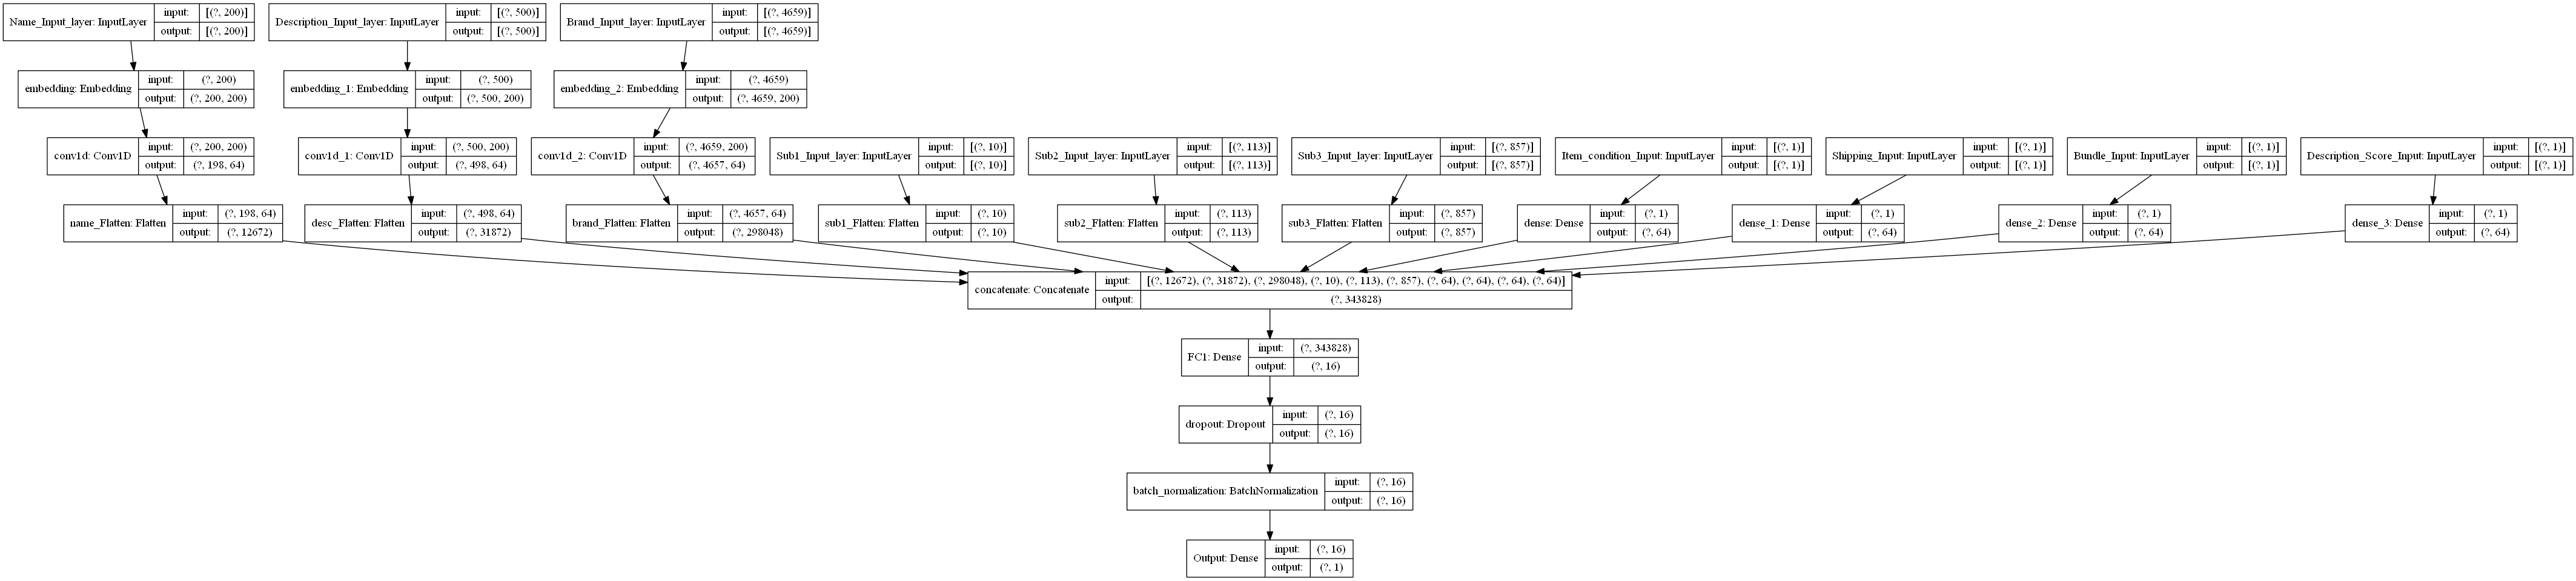

In [22]:
tf.keras.utils.plot_model(cnn_model, to_file='F:/Applied AI/Assignments/29.SelfCase Study - 1/cnn_model_arch.png', show_shapes=True)

In [23]:
cnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name_Input_layer (InputLayer)   [(None, 200)]        0                                            
__________________________________________________________________________________________________
Description_Input_layer (InputL [(None, 500)]        0                                            
__________________________________________________________________________________________________
Brand_Input_layer (InputLayer)  [(None, 4659)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 200)     40000       Name_Input_layer[0][0]           
______________________________________________________________________________________________

In [25]:
class Generator(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size=32):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        batch_y = np.array([self.y[i] for i in inds])
        return batch_x, batch_y

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [26]:
batch_size = 32

train_data_gen = Generator(processed_X_train, list(y_train), batch_size)
cv_data_gen = Generator(processed_X_cv, list(y_cv), batch_size)

In [27]:
def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return tf.sqrt(msle(y_true, y_pred))

In [28]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=rmsle, metrics=[rmsle])

In [29]:
cnn_model.fit_generator(generator=train_data_gen, validation_data=cv_data_gen, epochs=10, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32291 steps, validate for 13839 steps
Epoch 1/10
32291/32291 [==============================] - 2444s 76ms/step - loss: 0.6997 - rmsle: 0.6878 - val_loss: 0.5863 - val_rmsle: 0.5810
Epoch 2/10
32291/32291 [==============================] - 2447s 76ms/step - loss: 0.6164 - rmsle: 0.6111 - val_loss: 0.5926 - val_rmsle: 0.5874
Epoch 3/10
32291/32291 [==============================] - 2434s 75ms/step - loss: 0.6159 - rmsle: 0.6107 - val_loss: 0.5864 - val_rmsle: 0.5813
Epoch 4/10
32291/32291 [==============================] - 2435s 75ms/step - loss: 0.6259 - rmsle: 0.6210 - val_loss: 0.8127 - val_rmsle: 0.8022
Epoch 5/10
32291/32291 [==============================] - 2442s 76ms/step - loss: 0.7584 - rmsle: 0.7260 - val_loss: 0.6023 - val_rmsle: 0.5966
Epoch 6/10
32291/32291 [==============================] - 2465s 76ms/step - loss: 0.6195 - rmsle: 0.6146 -

In [66]:
# cnn_model.save('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/CNN_model.h5')

In [19]:
cnn_model = tf.keras.models.load_model('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/CNN_model.h5', compile=False)

In [8]:
class PredictGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_set, batch_size=32):
        self.x= x_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        return batch_x

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [116]:
batch_size = 32

test_data_gen = PredictGenerator(processed_X_test, batch_size)

In [25]:
predicted = cnn_model.predict_generator(generator=test_data_gen, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
108147/108147 [==============================] - 3901s 36ms/step-  - E - ETA: - ETA: 48  -  - ETA - ETA: 47 - ETA: 47: - ETA: 47:5 - ETA: 47:5 -  - ETA:  - ETA: 47: - ETA: 4 - ET - ET -  - ETA: 4 - ETA:  - ETA: 47: - - ETA: 47:4 - ETA: 47  - ETA - ET - ETA - ET - ETA: 47: - E -  - ETA: 47: - ETA: 47:3 - E - ETA - ETA: 4 - - ET - E - ETA: 4 - ETA: 47: - ETA: 4 - ETA: 4 - ETA - ETA:  - ETA: 4  - ETA: 47: - ETA: 4 - ETA: 47  - ETA: 47 - ETA: 47 - ETA: 47:1 - ETA - E - ETA: 47 - - ETA: 47: - ETA: 47: - ETA: 4 -  - ETA: 4 - ETA: - E - ETA: 47:0 - ETA: - ETA: 47:0 -  - ET - E - ETA: 46:5 - ET - ETA: - E - ETA: - - ETA - ETA: 46:4 - ETA: - ETA: 46: - ETA:  - ETA: 46:4 - ETA: - ETA: 46:4 -  - E - ETA: 4 -  - ETA: - ET - ETA:  - ETA: - ET - ETA - ETA: 46: - ET - ETA - E - - ETA: 46:2 - ETA:  - E - ETA: 46:2 - ETA:  - ETA: 4 - ETA: 45: - ETA - ETA: 45: - ET - ET - ET -  - ETA - ETA: 45 -  - ETA: 45: - ET - ETA: - ETA

In [ ]:
predicted = predicted.flatten()

In [49]:
with open('cnn_predicted.npy', 'wb') as f:
    np.save(f, predicted.flatten())

In [189]:
predicted = np.load('cnn_predicted.npy')
predicted

array([12.758989, 11.119507, 39.830505, ...,  9.322668, 14.389133,
       22.13418 ], dtype=float32)

In [190]:
len(predicted), processed_X_test[0].shape[0]

(3460704, 3460725)

In [191]:
print('Remaining Data to predict:', (processed_X_test[0].shape[0] - len(predicted)))

Remaining Data to predict: 21


In [ ]:
def predict_remain(test_data, predict_data):
    temp = np.empty(0)
    for inds in tqdm(range((test_data[0].shape[0] - len(predict_data)))):
        predicted = lstm_model.predict([test_data[0][-inds].toarray(), test_data[1][-inds].toarray(), 
                                        test_data[2][-inds].toarray(), test_data[3][-inds].toarray(), 
                                        test_data[4][-inds].toarray(), test_data[5][-inds].toarray(), 
                                        test_data[6][-inds], test_data[7][-inds], test_data[8][-inds], 
                                        test_data[9][-inds]].flatten())
        temp = np.append(temp, predicted)
    temp = np.flip(temp)
    return np.append(predict_data, temp)

predicted = predict_remain(processed_X_test, predicted)

In [193]:
len(predicted), processed_X_test[0].shape[0]

(3460725, 3460725)

In [195]:
temp = []
for i in predicted.tolist():
    if i<0:
        temp.append(0.0)
    else:
        temp.append(i) 
        
predicted = temp

In [197]:
output = pd.DataFrame()
output['test_id'] = test_df.reset_index()['test_id']
output['price'] = predicted

In [198]:
output.to_csv('cnn_submission.csv', index=False)

In [199]:
submission = pd.read_csv('cnn_submission.csv', sep='\t')
submission.head()

,"test_id,price"
0,"0,12.758989334106445"
1,"1,11.1195068359375"
2,"2,39.83050537109375"
3,"3,16.87874984741211"
4,"4,12.819249153137207"


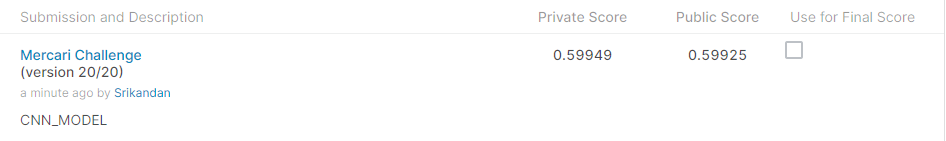

In [3]:
Image(filename='Results_cnn.PNG')

### LSTM Model:

In [232]:
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_train_list.pkl", "rb") as fp:
    processed_X_train = pickle.load(fp)
    
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_cv_list.pkl", "rb") as fp:
    processed_X_cv = pickle.load(fp)

In [233]:
def reset_clear_session():
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(0)
    rn.seed(0)
    
reset_clear_session()

In [234]:
# Product Name Input layers
name_input_layer = Input(shape=(tfidf_xtrain_name.shape[1],), name='Name_Input_layer')
name_emd_layer = Embedding(input_dim=tfidf_xtrain_name.shape[1], output_dim=100, input_length=tfidf_xtrain_name.shape[1])(name_input_layer)
name_lstm_layer = LSTM(32, return_sequences=True)(name_emd_layer)
name_flatten = Flatten(name='name_Flatten')(name_lstm_layer)

# Description Input layers
desc_input_layer = Input(shape=(tfidf_xtrain_description.shape[1],), name='Description_Input_layer')
desc_emd_layer = Embedding(input_dim=tfidf_xtrain_description.shape[1], output_dim=200, input_length=tfidf_xtrain_description.shape[1])(desc_input_layer)
desc_lstm_layer = LSTM(32, return_sequences=True)(desc_emd_layer)
desc_flatten = Flatten(name='desc_Flatten')(desc_lstm_layer)

# Brand Input layers
brand_input_layer = Input(shape=(onehot_brand_xtrain.shape[1],), name='Brand_Input_layer')
brand_emd_layer = Embedding(input_dim=onehot_brand_xtrain.shape[1], output_dim=100, input_length=onehot_brand_xtrain.shape[1])(brand_input_layer)
brand_lstm_layer = LSTM(32, return_sequences=True)(brand_emd_layer)
brand_flatten = Flatten(name='brand_Flatten')(brand_lstm_layer)

# SubCategory_1 Input layers
sub1_input_layer = Input(shape=(onehot_sub_l1_xtrain.shape[1],), name='Sub1_Input_layer')
sub1_flatten = Flatten(name='sub1_Flatten')(sub1_input_layer)

# SubCategory_2 Input layers
sub2_input_layer = Input(shape=(onehot_sub_l2_xtrain.shape[1],), name='Sub2_Input_layer')
sub2_flatten = Flatten(name='sub2_Flatten')(sub2_input_layer)

# SubCategory_3 Input layers
sub3_input_layer = Input(shape=(onehot_sub_l3_xtrain.shape[1],), name='Sub3_Input_layer')
sub3_flatten = Flatten(name='sub3_Flatten')(sub3_input_layer)

# Item Condition Input layers
item_input_layer = Input(shape=(1,), name='Item_condition_Input')
item_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(item_input_layer)

# Shipping Input layers
ship_input_layer = Input(shape=(1,), name='Shipping_Input')
ship_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(ship_input_layer)

# Item Condition Input layers
bundle_input_layer = Input(shape=(1,), name='Bundle_Input')
bundle_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(bundle_input_layer)

# Description Score Input layers
desc_score_input_layer = Input(shape=(1,), name='Description_Score_Input')
desc_score_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(desc_score_input_layer)


In [235]:
# Concating the above layers
concated_layers = concatenate([name_flatten, desc_flatten, brand_flatten, sub1_flatten, sub2_flatten, sub3_flatten, 
                               item_dense, ship_dense, bundle_dense, desc_score_dense], axis=1)

In [236]:
dense_1 = Dense(units=16, activation='relu', kernel_initializer=he_normal(seed=42), name='FC1', 
                kernel_regularizer=regularizers.l2(0.0001))(concated_layers)
drop_out_1 = Dropout(0.2)(dense_1)
batch_1 = BatchNormalization()(drop_out_1)

output_layer = Dense(units=1, activation='linear', name='Output')(batch_1)

In [237]:
lstm_model = Model(inputs=[name_input_layer, desc_input_layer, brand_input_layer, sub1_input_layer, sub2_input_layer, sub3_input_layer,
                       item_input_layer, ship_input_layer, bundle_input_layer, desc_score_input_layer], outputs=[output_layer])

# cnn_model = Model(inputs=[name_input_layer], outputs=[output_layer])

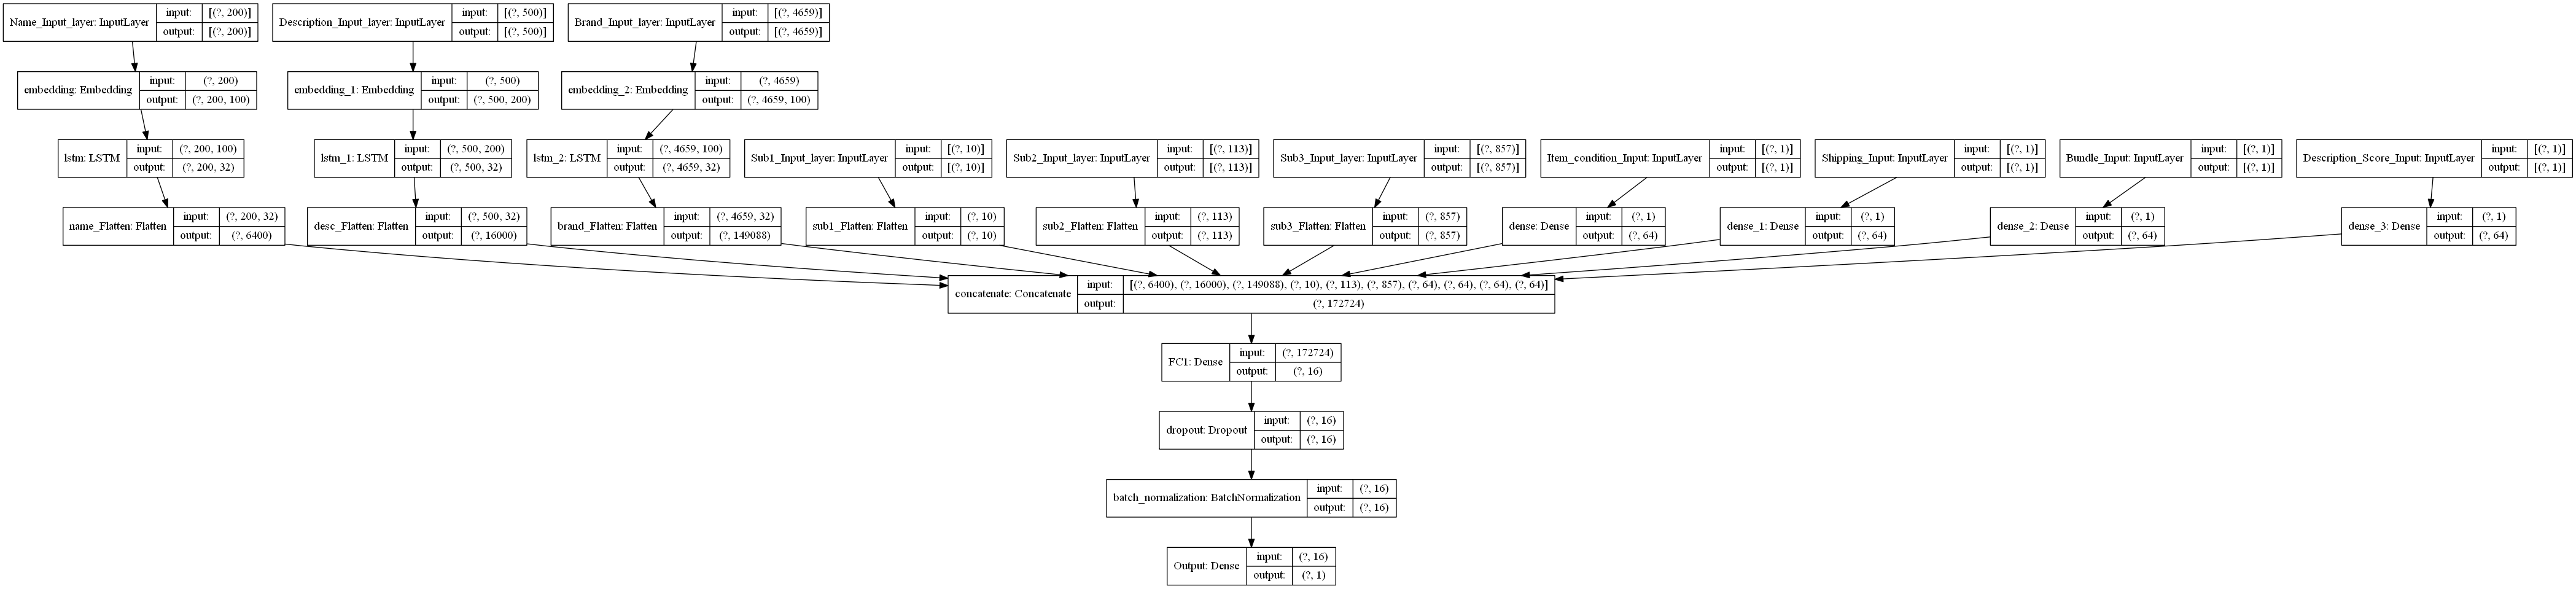

In [238]:
tf.keras.utils.plot_model(lstm_model, to_file='F:/Applied AI/Assignments/29.SelfCase Study - 1/lstm_model_arch.png', show_shapes=True)

In [239]:
lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name_Input_layer (InputLayer)   [(None, 200)]        0                                            
__________________________________________________________________________________________________
Description_Input_layer (InputL [(None, 500)]        0                                            
__________________________________________________________________________________________________
Brand_Input_layer (InputLayer)  [(None, 4659)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     20000       Name_Input_layer[0][0]           
______________________________________________________________________________________________

In [240]:
class Generator(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size=32, istest=False):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])
        self.istest = istest

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        batch_y = np.array([self.y[i] for i in inds])
        if (self.istest == False):
            return batch_x, batch_y
        else:
            return (batch_x, batch_y)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [247]:
batch_size = 32

train_data_gen = Generator(processed_X_train, list(y_train), batch_size)
cv_data_gen = Generator(processed_X_cv, list(y_cv), batch_size, True)

In [248]:
def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return tf.sqrt(msle(y_true, y_pred))

In [249]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='rmsle', patience=2)

In [250]:
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=rmsle, metrics=[rmsle])

In [251]:
lstm_model.fit(train_data_gen, validation_data=cv_data_gen, epochs=10, callbacks=[early_stop], verbose=1, workers=-1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32291 steps, validate for 13839 steps
Epoch 1/10
32291/32291 [==============================] - 5855s 181ms/step - loss: 0.7532 - rmsle: 0.7314 - val_loss: 0.6142 - val_rmsle: 0.5930
Epoch 2/10
32291/32291 [==============================] - 5745s 178ms/step - loss: 0.6147 - rmsle: 0.6028 - val_loss: 0.5915 - val_rmsle: 0.5826
Epoch 3/10
32291/32291 [==============================] - 5739s 178ms/step - loss: 0.6089 - rmsle: 0.6006 - val_loss: 0.5891 - val_rmsle: 0.5811
Epoch 4/10
32291/32291 [==============================] - 5634s 174ms/step - loss: 0.6086 - rmsle: 0.6006 - val_loss: 0.5905 - val_rmsle: 0.5825
Epoch 5/10
32291/32291 [==============================] - 5976s 185ms/step - loss: 0.6087 - rmsle: 0.6008 - val_loss: 0.5904 - val_rmsle: 0.5826
Epoch 6/10
32291/32291 [==============================] - 5628s 174ms/step - loss: 0.6088 - rmsle: 0.6009 - val_loss: 0.5886 - val_rmsle: 0.5807


In [ ]:
# lstm_model.save('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/CNN_model.h5')

In [8]:
processed_X_test = pickle.load(open('/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_test_list.pkl','rb'))

In [9]:
processed_X_test_1 = [processed_X_test[0][:1730362], processed_X_test[1][:1730362], 
                                    processed_X_test[2][:1730362], processed_X_test[3][:1730362], 
                                    processed_X_test[4][:1730362], processed_X_test[5][:1730362], 
                                    processed_X_test[6][:1730362], processed_X_test[7][:1730362], processed_X_test[8][:1730362], 
                                    processed_X_test[9][:1730362]]

processed_X_test_2 = [processed_X_test[0][1730362:], processed_X_test[1][1730362:], 
                                    processed_X_test[2][1730362:], processed_X_test[3][1730362:], 
                                    processed_X_test[4][1730362:], processed_X_test[5][1730362:], 
                                    processed_X_test[6][1730362:], processed_X_test[7][1730362:], processed_X_test[8][1730362:], 
                                    processed_X_test[9][1730362:]]

In [10]:
lstm_model = tf.keras.models.load_model('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/LSTM_model.h5', compile=False)

In [11]:
class PredictGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_set, batch_size=32):
        self.x= x_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        return batch_x

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [12]:
batch_size = 800

test_data_gen_1 = PredictGenerator(processed_X_test_1, batch_size)
test_data_gen_2 = PredictGenerator(processed_X_test_2, batch_size)

In [13]:
predicted_1 = lstm_model.predict(test_data_gen_1, verbose=1)
predicted_2 = lstm_model.predict(test_data_gen_2, verbose=1)

2162/2162 [==============================] - 1471s 680ms/step


In [15]:
with open('lstm_predicted_1.npy', 'wb') as f:
    np.save(f, predicted_1.flatten())
    
with open('lstm_predicted_2.npy', 'wb') as f:
    np.save(f, predicted_2.flatten())

In [ ]:
predicted_1 = np.load('lstm_predicted_1.npy')
predicted_1

predicted_2 = np.load('lstm_predicted_2.npy')
predicted_2

In [16]:
predicted_1 = predicted_1.flatten()
predicted_2 = predicted_2.flatten()

In [17]:
print('Remaining Data to predict:', (processed_X_test_1[0].shape[0] - len(predicted_1)))
print('Remaining Data to predict:', (processed_X_test_2[0].shape[0] - len(predicted_2)))

Remaining Data to predict: 762
Remaining Data to predict: 763


In [19]:
def predict_remain(test_data, predict_data):
    temp = np.empty(0)
    for inds in tqdm(range((test_data[0].shape[0] - len(predict_data)))):
        predicted = lstm_model.predict([test_data[0][-inds].toarray(), test_data[1][-inds].toarray(), 
                                        test_data[2][-inds].toarray(), test_data[3][-inds].toarray(), 
                                        test_data[4][-inds].toarray(), test_data[5][-inds].toarray(), 
                                        test_data[6][-inds], test_data[7][-inds], test_data[8][-inds], 
                                        test_data[9][-inds]]).flatten()
        temp = np.append(temp, predicted)
    temp = np.flip(temp)
    return np.append(predict_data, temp)
    
predicted_1 = predict_remain(processed_X_test_1, predicted_1)
predicted_2 = predict_remain(processed_X_test_2, predicted_2)

100%|████████████████████████████████████████████████████████████████████████████████| 763/763 [05:19<00:00,  2.39it/s]


In [20]:
print(len(predicted_1), processed_X_test_1[0].shape[0])
print(len(predicted_2), processed_X_test_2[0].shape[0])

1730362 1730362
1730363 1730363


In [21]:
predicted = np.concatenate((predicted_1, predicted_2), axis=None)
predicted

array([14.42839432,  9.61394978, 41.33748627, ..., 15.76438141,
       17.49715996, 17.36941338])

In [23]:
with open('lstm_predicted.npy', 'wb') as f:
    np.save(f, predicted.flatten())

In [24]:
temp = []
for i in predicted.tolist():
    if i<0:
        temp.append(0.0)
    else:
        temp.append(i) 
        
predicted = temp

In [25]:
output = pd.DataFrame()
output['test_id'] = test_df.reset_index()['test_id']
output['price'] = predicted

In [26]:
output.to_csv('lstm_submission.csv', index=False)

In [27]:
submission = pd.read_csv('lstm_submission.csv', sep='\t')
submission.head()

,"test_id,price"
0,"0,14.428394317626953"
1,"1,9.6139497756958"
2,"2,41.337486267089844"
3,"3,13.594545364379883"
4,"4,12.573509216308594"


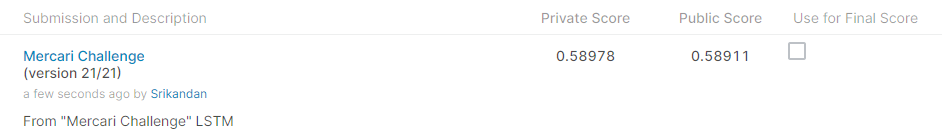

In [4]:
Image(filename='Results_lstm.PNG')

### CNN + LSTM Model:

In [18]:
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_train_list.pkl", "rb") as fp:
    processed_X_train = pickle.load(fp)
    
with open("/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_cv_list.pkl", "rb") as fp:
    processed_X_cv = pickle.load(fp)

In [19]:
def reset_clear_session():
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(0)
    rn.seed(0)
    
reset_clear_session()

In [20]:
# Product Name Input layers
name_input_layer = Input(shape=(tfidf_xtrain_name.shape[1],), name='Name_Input_layer')
name_emd_layer = Embedding(input_dim=tfidf_xtrain_name.shape[1], output_dim=100, input_length=tfidf_xtrain_name.shape[1])(name_input_layer)
name_cnn_layer_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(name_emd_layer)
name_lstm_layer_1 = LSTM(32, return_sequences=True)(name_cnn_layer_1)
name_cnn_layer_2 = tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(name_lstm_layer_1)
name_lstm_layer_2 = LSTM(16, return_sequences=True)(name_cnn_layer_2)
name_flatten = Flatten(name='name_Flatten')(name_lstm_layer_2)

# Description Input layers
desc_input_layer = Input(shape=(tfidf_xtrain_description.shape[1],), name='Description_Input_layer')
desc_emd_layer = Embedding(input_dim=tfidf_xtrain_description.shape[1], output_dim=200, input_length=tfidf_xtrain_description.shape[1])(desc_input_layer)
desc_cnn_layer_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(desc_emd_layer)
desc_lstm_layer_1 = LSTM(32, return_sequences=True)(desc_cnn_layer_1)
desc_cnn_layer_2 = tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(desc_lstm_layer_1)
desc_lstm_layer_2 = LSTM(16, return_sequences=True)(desc_cnn_layer_2)
desc_flatten = Flatten(name='desc_Flatten')(desc_lstm_layer_2)

# Brand Input layers
brand_input_layer = Input(shape=(onehot_brand_xtrain.shape[1],), name='Brand_Input_layer')
brand_emd_layer = Embedding(input_dim=onehot_brand_xtrain.shape[1], output_dim=100, input_length=onehot_brand_xtrain.shape[1])(brand_input_layer)
brand_cnn_layer_1 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(brand_emd_layer)
brand_lstm_layer_1 = LSTM(32, return_sequences=True)(brand_cnn_layer_1)
brand_cnn_layer_2 = tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', kernel_initializer="he_uniform")(brand_lstm_layer_1)
brand_lstm_layer_2 = LSTM(16, return_sequences=True)(brand_cnn_layer_2)
brand_flatten = Flatten(name='brand_Flatten')(brand_lstm_layer_2)

# SubCategory_1 Input layers
sub1_input_layer = Input(shape=(onehot_sub_l1_xtrain.shape[1],), name='Sub1_Input_layer')
sub1_flatten = Flatten(name='sub1_Flatten')(sub1_input_layer)

# SubCategory_2 Input layers
sub2_input_layer = Input(shape=(onehot_sub_l2_xtrain.shape[1],), name='Sub2_Input_layer')
sub2_flatten = Flatten(name='sub2_Flatten')(sub2_input_layer)

# SubCategory_3 Input layers
sub3_input_layer = Input(shape=(onehot_sub_l3_xtrain.shape[1],), name='Sub3_Input_layer')
sub3_flatten = Flatten(name='sub3_Flatten')(sub3_input_layer)

# Item Condition Input layers
item_input_layer = Input(shape=(1,), name='Item_condition_Input')
item_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(item_input_layer)

# Shipping Input layers
ship_input_layer = Input(shape=(1,), name='Shipping_Input')
ship_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(ship_input_layer)

# Item Condition Input layers
bundle_input_layer = Input(shape=(1,), name='Bundle_Input')
bundle_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(bundle_input_layer)

# Description Score Input layers
desc_score_input_layer = Input(shape=(1,), name='Description_Score_Input')
desc_score_dense = Dense(64, activation='relu', kernel_initializer=he_normal(seed=42), 
                  kernel_regularizer=regularizers.l2(0.0001))(desc_score_input_layer)


In [21]:
# Concating the above layers
concated_layers = concatenate([name_flatten, desc_flatten, brand_flatten, sub1_flatten, sub2_flatten, sub3_flatten, 
                               item_dense, ship_dense, bundle_dense, desc_score_dense], axis=1)

In [22]:
dense_1 = Dense(units=16, activation='relu', kernel_initializer=he_normal(seed=42), name='FC1', 
                kernel_regularizer=regularizers.l2(0.0001))(concated_layers)
drop_out_1 = Dropout(0.2)(dense_1)
batch_1 = BatchNormalization()(drop_out_1)

output_layer = Dense(units=1, activation='linear', name='Output')(batch_1)

In [23]:
cnn_lstm_model = Model(inputs=[name_input_layer, desc_input_layer, brand_input_layer, sub1_input_layer, sub2_input_layer, sub3_input_layer,
                       item_input_layer, ship_input_layer, bundle_input_layer, desc_score_input_layer], outputs=[output_layer])

# cnn_model = Model(inputs=[name_input_layer], outputs=[output_layer])

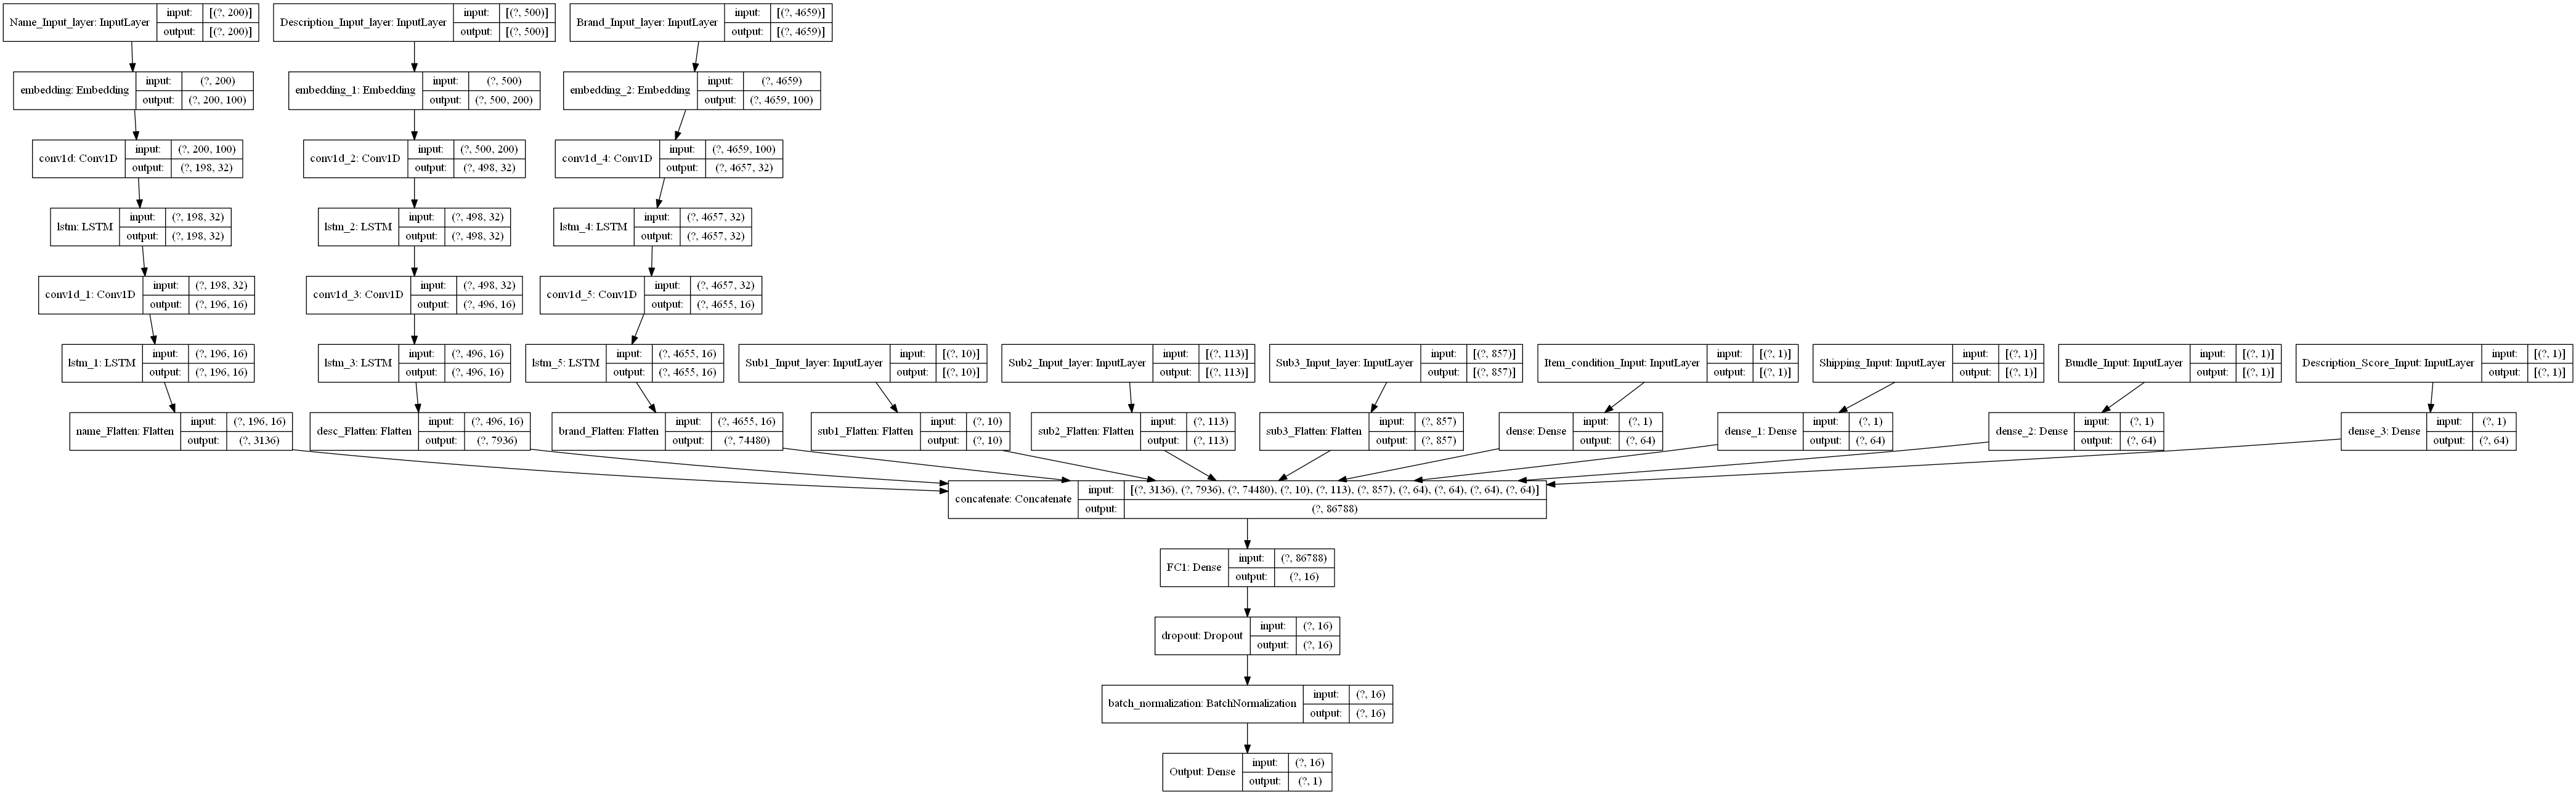

In [24]:
tf.keras.utils.plot_model(cnn_lstm_model, to_file='F:/Applied AI/Assignments/29.SelfCase Study - 1/CNN_lstm_model_arch.png', show_shapes=True)

In [25]:
cnn_lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name_Input_layer (InputLayer)   [(None, 200)]        0                                            
__________________________________________________________________________________________________
Description_Input_layer (InputL [(None, 500)]        0                                            
__________________________________________________________________________________________________
Brand_Input_layer (InputLayer)  [(None, 4659)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     20000       Name_Input_layer[0][0]           
______________________________________________________________________________________________

In [26]:
class Generator(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size=32, istest=False):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])
        self.istest = istest

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        batch_y = np.array([self.y[i] for i in inds])
        if (self.istest == False):
            return batch_x, batch_y
        else:
            return (batch_x, batch_y)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [27]:
batch_size = 32

train_data_gen = Generator(processed_X_train, list(y_train), batch_size)
cv_data_gen = Generator(processed_X_cv, list(y_cv), batch_size, True)

In [28]:
def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return tf.sqrt(msle(y_true, y_pred))

In [29]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='rmsle', patience=2)

In [30]:
cnn_lstm_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=rmsle, metrics=[rmsle])

In [31]:
cnn_lstm_model.fit(train_data_gen, validation_data=cv_data_gen, epochs=10, callbacks=[early_stop], verbose=1, workers=-1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32291 steps, validate for 13839 steps
Epoch 1/10
32291/32291 [==============================] - 9789s 303ms/step - loss: 0.7524 - rmsle: 0.7439 - val_loss: 0.5907 - val_rmsle: 0.5854
Epoch 2/10
32291/32291 [==============================] - 9729s 301ms/step - loss: 0.6143 - rmsle: 0.6094 - val_loss: 0.5845 - val_rmsle: 0.5798
Epoch 3/10
32291/32291 [==============================] - 9713s 301ms/step - loss: 0.6131 - rmsle: 0.6084 - val_loss: 0.5856 - val_rmsle: 0.5810
Epoch 4/10
32291/32291 [==============================] - 9764s 302ms/step - loss: 0.6119 - rmsle: 0.6076 - val_loss: 0.5865 - val_rmsle: 0.5822
Epoch 5/10
32291/32291 [==============================] - 9810s 304ms/step - loss: 0.6113 - rmsle: 0.6069 - val_loss: 0.5830 - val_rmsle: 0.5787
Epoch 6/10
32291/32291 [==============================] - 9649s 299ms/step - loss: 0.6112 - rmsle: 0.6069 - val_loss: 0.5833 - val_rmsle: 0.5789
Epoch 7/10
32291/32291 [========

In [32]:
# cnn_lstm_model.save('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/CNN_LSTM_model.h5')

In [8]:
cnn_lstm_model = tf.keras.models.load_model('/Applied AI/Assignments/29.SelfCase Study - 1/NN Model/CNN_LSTM_model.h5', compile=False)

In [9]:
processed_X_test = pickle.load(open('/Applied AI/Assignments/29.SelfCase Study - 1/Featured Engineered dataset/processed_X_test_list.pkl','rb'))

In [10]:
processed_X_test_1 = [processed_X_test[0][:1730362], processed_X_test[1][:1730362], 
                                    processed_X_test[2][:1730362], processed_X_test[3][:1730362], 
                                    processed_X_test[4][:1730362], processed_X_test[5][:1730362], 
                                    processed_X_test[6][:1730362], processed_X_test[7][:1730362], processed_X_test[8][:1730362], 
                                    processed_X_test[9][:1730362]]

processed_X_test_2 = [processed_X_test[0][1730362:], processed_X_test[1][1730362:], 
                                    processed_X_test[2][1730362:], processed_X_test[3][1730362:], 
                                    processed_X_test[4][1730362:], processed_X_test[5][1730362:], 
                                    processed_X_test[6][1730362:], processed_X_test[7][1730362:], processed_X_test[8][1730362:], 
                                    processed_X_test[9][1730362:]]

In [11]:
class PredictGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_set, batch_size=32):
        self.x= x_set
        self.batch_size = batch_size
        self.indices = np.arange(self.x[0].shape[0])

    def __len__(self):
        return math.floor(self.x[0].shape[0] / self.batch_size)

    def __getitem__(self, idx):
        inds = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [(np.squeeze(self.x[0][inds].toarray(), axis=None)), (np.squeeze(self.x[1][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[2][inds].toarray(), axis=None)), (np.squeeze(self.x[3][inds].toarray(), axis=None)), 
                   (np.squeeze(self.x[4][inds].toarray(), axis=None)), (np.squeeze(self.x[5][inds].toarray(), axis=None)),
                   self.x[6][inds], self.x[7][inds], self.x[8][inds], self.x[9][inds]]
        return batch_x

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [12]:
batch_size = 300

test_data_gen_1 = PredictGenerator(processed_X_test_1, batch_size)
test_data_gen_2 = PredictGenerator(processed_X_test_2, batch_size)

In [13]:
predicted_1 = cnn_lstm_model.predict(test_data_gen_1, verbose=1)
predicted_2 = cnn_lstm_model.predict(test_data_gen_2, verbose=1)

5767/5767 [==============================] - 4957s 859ms/step


In [14]:
with open('cnn_lstm_predicted_1.npy', 'wb') as f:
    np.save(f, predicted_1.flatten())
    
with open('cnn_lstm_predicted_2.npy', 'wb') as f:
    np.save(f, predicted_2.flatten())

In [15]:
predicted_1 = np.load('cnn_lstm_predicted_1.npy')
predicted_1

predicted_2 = np.load('cnn_lstm_predicted_2.npy')
predicted_2

array([15.475124 , 15.619473 , 24.274376 , ..., 27.694569 , 53.34042  ,
        7.8573956], dtype=float32)

In [16]:
predicted_1 = predicted_1.flatten()
predicted_2 = predicted_2.flatten()

In [19]:
print('Remaining Data to predict:', (processed_X_test_1[0].shape[0] - len(predicted_1)))
print('Remaining Data to predict:', (processed_X_test_2[0].shape[0] - len(predicted_2)))

Remaining Data to predict: 262
Remaining Data to predict: 263


In [20]:
def predict_remain(test_data, predict_data):
    temp = np.empty(0)
    for inds in tqdm(range((test_data[0].shape[0] - len(predict_data)))):
        predicted = cnn_lstm_model.predict([test_data[0][-inds].toarray(), test_data[1][-inds].toarray(), 
                                        test_data[2][-inds].toarray(), test_data[3][-inds].toarray(), 
                                        test_data[4][-inds].toarray(), test_data[5][-inds].toarray(), 
                                        test_data[6][-inds], test_data[7][-inds], test_data[8][-inds], 
                                        test_data[9][-inds]]).flatten()
        temp = np.append(temp, predicted)
    temp = np.flip(temp)
    return np.append(predict_data, temp)
    
predicted_1 = predict_remain(processed_X_test_1, predicted_1)
predicted_2 = predict_remain(processed_X_test_2, predicted_2)

100%|████████████████████████████████████████████████████████████████████████████████| 263/263 [03:27<00:00,  1.27it/s]


In [21]:
print(len(predicted_1), processed_X_test_1[0].shape[0])
print(len(predicted_2), processed_X_test_2[0].shape[0])

1730362 1730362
1730363 1730363


In [22]:
predicted = np.concatenate((predicted_1, predicted_2), axis=None)
predicted

array([13.84963989, 10.02292156, 38.46829987, ..., 16.88351631,
       21.59652519, 15.47512531])

In [23]:
with open('cnn_lstm_predicted.npy', 'wb') as f:
    np.save(f, predicted.flatten())

In [24]:
temp = []
for i in predicted.tolist():
    if i<0:
        temp.append(0.0)
    else:
        temp.append(i) 
        
predicted = temp

In [25]:
output = pd.DataFrame()
output['test_id'] = test_df.reset_index()['test_id']
output['price'] = predicted

In [26]:
output.to_csv('cnn_lstm_submission.csv', index=False)

In [27]:
submission = pd.read_csv('cnn_lstm_submission.csv', sep='\t')
submission.head()

,"test_id,price"
0,"0,13.849639892578125"
1,"1,10.022921562194824"
2,"2,38.468299865722656"
3,"3,16.05309295654297"
4,"4,13.579888343811035"


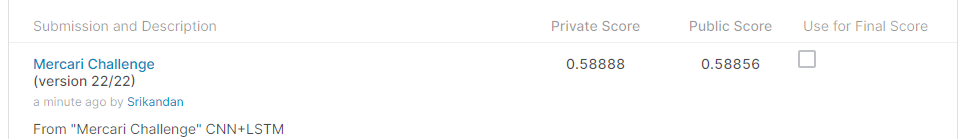

In [5]:
Image(filename='Results_cnn_lstm.PNG')

### * All Three Results:

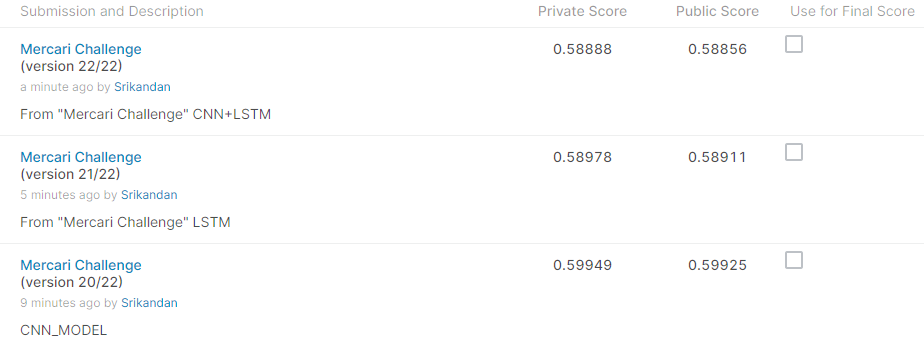

In [6]:
Image(filename='Results_dl.PNG')